In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv("IRIS.csv")

In [3]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
x = iris.iloc[:, [2,3]]

In [5]:
x

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [6]:
y = iris['species']

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print("Class labels:", np.unique(y))

Class labels: [0 1 2]


## Train_test split

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2, stratify=y)

In [38]:
print('Labels count in y:', np.bincount(y))

Labels count in y: [50 50 50]


In [39]:
print('Labels count in y_train', np.bincount(y_train))

Labels count in y_train [35 35 35]


In [40]:
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y_test: [15 15 15]


## Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

## Perceptron

In [46]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=2)
ppn.fit(x_train_std, y_train)


Perceptron(eta0=0.1, random_state=2)

In [47]:
y_pred = ppn.predict(x_test_std)

In [48]:
print(y_pred, y_test)

[1 0 0 0 1 0 1 2 1 2 0 2 1 0 0 0 1 2 1 0 0 1 2 1 0 0 0 2 2 2 1 2 0 1 2 0 2
 1 0 2 1 1 1 1 2] [1 0 0 0 1 0 1 2 2 2 0 2 1 0 0 0 1 2 2 1 0 1 2 1 0 0 0 2 2 2 1 2 0 1 2 0 2
 1 0 2 1 1 1 1 2]


In [49]:
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 3


In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy', accuracy)

Accuracy 0.9333333333333333


In [56]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):
    # Setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x[y == cl, 0],
                    x[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # Highlight test examples
    if test_idx:
        x_test, y_test = x[test_idx, :], y[test_idx]
        plt.scatter(x_test[:, 0], x_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='best')
    plt.show()


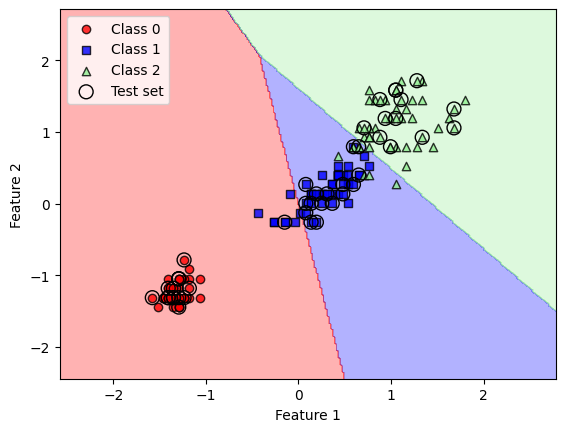

<Figure size 640x480 with 0 Axes>

In [61]:
 X_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))

# Plot decision regions
plot_decision_regions(x=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(len(y_train), len(y_train) + len(y_test)))

# Set axis labels and legend

plt.tight_layout()
plt.show()

## Thank you